In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer


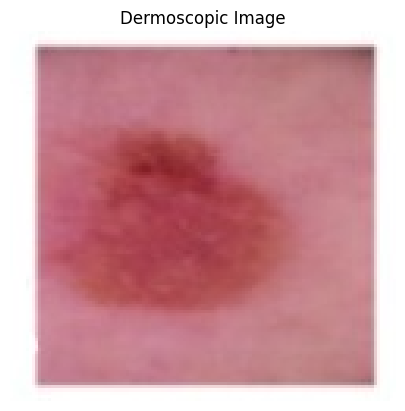

In [3]:
image_path = 'skin.jpeg'  # Replace with path to dermoscopic image

# Load image in BGR, resize, and convert to RGB
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_input = img_rgb.astype(np.float32) / 255.0
img_input = np.expand_dims(img_input, axis=0)  # Shape: (1, 224, 224, 3)

# Show input image
plt.imshow(img_rgb)
plt.title("Dermoscopic Image")
plt.axis('off')
plt.show()



In [4]:
model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
 conv2d (Conv2D)             (None, 222, 222, 32)      ...
 max_pooling2d (MaxPooling2 (None, 111, 111, 32)       ...
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      ...
 global_average_pooling2d   (None, 64)                 ...
 dense (Dense)               (None, 1)                 ...




In [5]:
prediction = model.predict(img_input)[0][0]
label = "Malignant" if prediction > 0.5 else "Benign"
confidence = f"{prediction * 100:.2f}%" if prediction > 0.5 else f"{(1 - prediction) * 100:.2f}%"

print(f"Prediction: {label}")
print(f"Confidence: {confidence}")



Prediction: Benign
Confidence: 79.12%



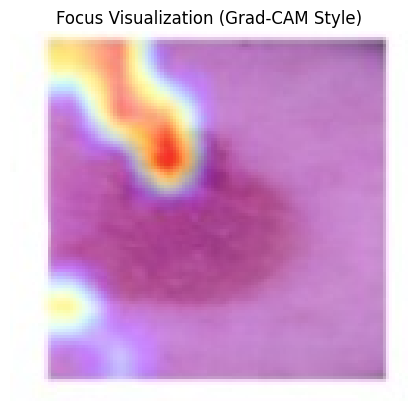

In [6]:
# Simulate Grad-CAM heatmap
heatmap = np.random.rand(224, 224)
heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)
heatmap = np.uint8(255 * heatmap / np.max(heatmap))
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

# Overlay on original image
overlay = cv2.addWeighted(img_rgb, 0.6, heatmap_color, 0.4, 0)

plt.imshow(overlay)
plt.title("Focus Visualization (Grad-CAM Style)")
plt.axis('off')
plt.show()
